In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('Winni Reports.csv')
df.head(10)

,year,date,air_temp_f,water_temp_f,thermocline_depth_ft,wind_speed_mph,wind_dir,weather,location,time,fish_type,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,duration
0,2016,8/23/2016,47.0,73.1,NaN,6,sw,sunny,south of welch,8:25,horned pout,10.0,35.0,NaN,7:10,9:00,1:50
1,2015,9/3/2015,69.0,75.5,NaN,4,nw,hazy,north of diamond,6:45,lake trout,17.0,29.0,NaN,6:30,9:30,3:00
2,2017,7/17/2017,68.0,74.8,NaN,0,NaN,hazy,north of welch,6:50,lake trout,16.0,31.0,NaN,6:45,7:50,1:05
3,2015,7/18/2015,62.0,73.4,NaN,15,se,raining,south of sandy,6:55,lake trout,20.0,135.0,NaN,6:15,10:30,4:15
4,2017,7/17/2017,68.0,74.8,NaN,0,NaN,hazy,north of welch,7:05,lake trout,16.0,31.0,NaN,6:45,7:50,1:05
5,2018,8/6/2018,68.0,78.1,NaN,10,w,sunny,south of welch,7:09,lake trout,17.0,45.0,NaN,6:50,10:00,3:10
6,2018,8/2/2018,73.0,76.0,NaN,8,sw,overcast,east of lockes,7:19,lake trout,16.0,45.0,NaN,6:20,10:15,3:55
7,2018,9/16/2018,64.0,72.5,NaN,5,s,fog,varney point,7:22,lake trout,15.0,45.0,NaN,7:10,10:05,2:55
8,2015,6/7/2015,40.0,59.0,NaN,0,NaN,sunny,wolfboro bay,7:25,lake trout,18.0,15.0,NaN,6:30,10:30,4:00
9,2015,6/7/2015,40.0,59.0,NaN,0,NaN,sunny,wolfboro bay,7:40,lake trout,18.0,20.0,NaN,6:30,10:30,4:00


In [3]:
df.shape

(454, 17)

In [4]:
df.dtypes

year                      int64
date                     object
air_temp_f              float64
water_temp_f            float64
thermocline_depth_ft    float64
wind_speed_mph            int64
wind_dir                 object
weather                  object
location                 object
time                     object
fish_type                object
fish_length_in          float64
water_depth_ft          float64
skunked                  object
lines_in                 object
lines_out                object
duration                 object
dtype: object

In [5]:
df.isnull().sum()

year                      0
date                      0
air_temp_f               51
water_temp_f             36
thermocline_depth_ft    418
wind_speed_mph            0
wind_dir                 64
weather                  20
location                  0
time                     71
fish_type                71
fish_length_in           80
water_depth_ft           91
skunked                 383
lines_in                  0
lines_out                 0
duration                  0
dtype: int64

In [6]:
def rough_location(col):
    name_list = []
    directions = ['east', 'west', 'north', 'south', 'of']

    for i in col.split():
        if i not in directions:
            name_list.append(i)
    return ' '.join(name_list)

In [7]:
df['location2'] = df['location'].map(lambda x: rough_location(x))

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df.loc[(df['wind_dir'] == 'ene')]

,year,date,air_temp_f,water_temp_f,thermocline_depth_ft,wind_speed_mph,wind_dir,weather,location,time,fish_type,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,duration,location2
17,2018,2018-05-27,57.0,59.3,NaN,15,ene,overcast,west of timber,8:10,lake trout,20.0,27.0,NaN,7:50,10:45,2:55,timber


In [10]:
df.at[320,'wind_dir']= 'ne'

In [11]:
df.loc[[320]]

,year,date,air_temp_f,water_temp_f,thermocline_depth_ft,wind_speed_mph,wind_dir,weather,location,time,fish_type,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,duration,location2
320,2015,2015-07-12,69.0,72.0,NaN,10,ne,sunny,south of sandy,9:30,salmon,10.0,25.0,NaN,8:30,10:20,1:50,sandy


In [12]:
def change_fish_type(fish):
    if fish == 'small mouth bass':
        return 'smallmouth'
    elif fish == 'salmon ':
        return 'salmon'
    elif fish == 'lake trout ':
        return 'lake trout'
    return fish

df['fish_type'] = df['fish_type'].map(change_fish_type)

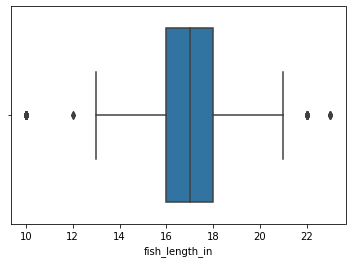

In [13]:
sns.boxplot(x = df['fish_length_in']);

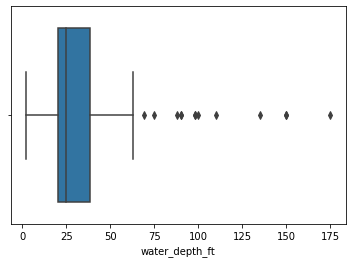

In [14]:
sns.boxplot(x = df['water_depth_ft']);

In [15]:
df.loc[df['year'] == '14:30']

,year,date,air_temp_f,water_temp_f,thermocline_depth_ft,wind_speed_mph,wind_dir,weather,location,time,fish_type,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,duration,location2


In [16]:
df.loc[df['year'] == '7:40']

,year,date,air_temp_f,water_temp_f,thermocline_depth_ft,wind_speed_mph,wind_dir,weather,location,time,fish_type,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,duration,location2


In [17]:
df = df.drop(columns = 'thermocline_depth_ft')

In [18]:
def change_weather(condition):
    if condition == 'calm' or condition == 'partly sunny' or condition == 'slight wind':
        return 'sunny'
    elif condition == 'rainy':
        return 'raining'
    elif condition == 'cloudy':
        return 'overcast'
    return condition

df['weather'] = df['weather'].map(change_weather)

In [19]:
df['time2'] = pd.to_datetime(df['time'])
#df['time2'] = df['time2'].dt.time

In [20]:
#df.iloc[451, df.columns.get_loc('skunked')] = True

In [21]:
#df['lines_in'] = pd.to_datetime(df['lines_in'])
#df['lines_in'] = df['lines_in'].dt.time

In [22]:
#df['lines_out'] = pd.to_datetime(df['lines_out'])
#df['lines_out'] = df['lines_out'].dt.time

In [23]:
df['duration'] = pd.to_datetime(df['duration'])
df['minutes'] = df['duration'].dt.hour * 60 + df['duration'].dt.minute + df['duration'].dt.second/60
df.drop(columns = 'duration', inplace = True)
df.head()

,year,date,air_temp_f,water_temp_f,wind_speed_mph,wind_dir,weather,location,time,fish_type,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,location2,time2,minutes
0,2016,2016-08-23,47.0,73.1,6,sw,sunny,south of welch,8:25,horned pout,10.0,35.0,NaN,7:10,9:00,welch,2022-07-06 08:25:00,110.0
1,2015,2015-09-03,69.0,75.5,4,nw,hazy,north of diamond,6:45,lake trout,17.0,29.0,NaN,6:30,9:30,diamond,2022-07-06 06:45:00,180.0
2,2017,2017-07-17,68.0,74.8,0,NaN,hazy,north of welch,6:50,lake trout,16.0,31.0,NaN,6:45,7:50,welch,2022-07-06 06:50:00,65.0
3,2015,2015-07-18,62.0,73.4,15,se,raining,south of sandy,6:55,lake trout,20.0,135.0,NaN,6:15,10:30,sandy,2022-07-06 06:55:00,255.0
4,2017,2017-07-17,68.0,74.8,0,NaN,hazy,north of welch,7:05,lake trout,16.0,31.0,NaN,6:45,7:50,welch,2022-07-06 07:05:00,65.0


## Imputing NaNs

In [24]:
df.dtypes

year                       int64
date              datetime64[ns]
air_temp_f               float64
water_temp_f             float64
wind_speed_mph             int64
wind_dir                  object
weather                   object
location                  object
time                      object
fish_type                 object
fish_length_in           float64
water_depth_ft           float64
skunked                   object
lines_in                  object
lines_out                 object
location2                 object
time2             datetime64[ns]
minutes                  float64
dtype: object

In [25]:
df.isnull().sum()

year                0
date                0
air_temp_f         51
water_temp_f       36
wind_speed_mph      0
wind_dir           64
weather            20
location            0
time               71
fish_type          71
fish_length_in     80
water_depth_ft     91
skunked           383
lines_in            0
lines_out           0
location2           0
time2              71
minutes             0
dtype: int64

In [26]:
df['month'] = df['date'].dt.month
df.head()

,year,date,air_temp_f,water_temp_f,wind_speed_mph,wind_dir,weather,location,time,fish_type,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,location2,time2,minutes,month
0,2016,2016-08-23,47.0,73.1,6,sw,sunny,south of welch,8:25,horned pout,10.0,35.0,NaN,7:10,9:00,welch,2022-07-06 08:25:00,110.0,8
1,2015,2015-09-03,69.0,75.5,4,nw,hazy,north of diamond,6:45,lake trout,17.0,29.0,NaN,6:30,9:30,diamond,2022-07-06 06:45:00,180.0,9
2,2017,2017-07-17,68.0,74.8,0,NaN,hazy,north of welch,6:50,lake trout,16.0,31.0,NaN,6:45,7:50,welch,2022-07-06 06:50:00,65.0,7
3,2015,2015-07-18,62.0,73.4,15,se,raining,south of sandy,6:55,lake trout,20.0,135.0,NaN,6:15,10:30,sandy,2022-07-06 06:55:00,255.0,7
4,2017,2017-07-17,68.0,74.8,0,NaN,hazy,north of welch,7:05,lake trout,16.0,31.0,NaN,6:45,7:50,welch,2022-07-06 07:05:00,65.0,7


In [27]:
air_temp_dict = df.groupby('month')['air_temp_f'].mean().to_dict()
df['air_temp_f'] = df['air_temp_f'].fillna(df['month'].map(air_temp_dict))
water_temp_dict = df.groupby('month')['water_temp_f'].mean().to_dict()
df['water_temp_f'] = df['water_temp_f'].fillna(df['month'].map(water_temp_dict))
fish_length_dict = df.groupby('fish_type')['fish_length_in'].mean().to_dict()
df['fish_length_in'] = df['fish_length_in'].fillna(df['fish_type'].map(fish_length_dict))

In [28]:
df['wind_dir'].fillna('no_wind', inplace=True)

In [29]:
df['skunked'].fillna(False, inplace = True)

In [30]:
df['weather'].fillna('no_weather_recorded', inplace = True)
df['time'].fillna('no_time_recorded', inplace = True)
df['fish_type'].fillna('no_fish_caught', inplace = True)
#df['fish_length_in'].fillna('no_recording', inplace = True)
#df['water_depth_ft'].fillna('no_fish_caught', inplace = True)

In [31]:
df.rename(columns = {'minutes': 'duration_min', 'location2': 'general_loc', 'time':'time_caught'}, inplace = True)
df.drop(columns = 'time2', inplace = True)

In [32]:
df['hour'] = df['time_caught'].map(lambda x:re.search(r'.*(?=:)',x)[0] if x != 'no_time_recorded' else 0)

In [33]:
df['hour'] = df['hour'].astype(int)

In [34]:
# df['time_caught_bucket'] = pd.cut(df['hour'], bins=range(5, 18, 2), right=False)

In [35]:
df.head()

,year,date,air_temp_f,water_temp_f,wind_speed_mph,wind_dir,weather,location,time_caught,fish_type,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,general_loc,duration_min,month,hour
0,2016,2016-08-23,47.0,73.1,6,sw,sunny,south of welch,8:25,horned pout,10.0,35.0,False,7:10,9:00,welch,110.0,8,8
1,2015,2015-09-03,69.0,75.5,4,nw,hazy,north of diamond,6:45,lake trout,17.0,29.0,False,6:30,9:30,diamond,180.0,9,6
2,2017,2017-07-17,68.0,74.8,0,no_wind,hazy,north of welch,6:50,lake trout,16.0,31.0,False,6:45,7:50,welch,65.0,7,6
3,2015,2015-07-18,62.0,73.4,15,se,raining,south of sandy,6:55,lake trout,20.0,135.0,False,6:15,10:30,sandy,255.0,7,6
4,2017,2017-07-17,68.0,74.8,0,no_wind,hazy,north of welch,7:05,lake trout,16.0,31.0,False,6:45,7:50,welch,65.0,7,7


In [36]:
df.dtypes

year                       int64
date              datetime64[ns]
air_temp_f               float64
water_temp_f             float64
wind_speed_mph             int64
wind_dir                  object
weather                   object
location                  object
time_caught               object
fish_type                 object
fish_length_in           float64
water_depth_ft           float64
skunked                     bool
lines_in                  object
lines_out                 object
general_loc               object
duration_min             float64
month                      int64
hour                       int64
dtype: object

In [37]:
df2 = df.loc[(df['water_depth_ft'] != 'no_fish_caught')]

df2['water_depth_ft'] = df2['water_depth_ft'].astype(float)

df2['month'] = df2['month'].astype(str)

df2['fish_type_month'] = df2['fish_type']  + '_' + df2['month']

df2['month'] = df2['month'].astype(int)

df2.head()

,year,date,air_temp_f,water_temp_f,wind_speed_mph,wind_dir,weather,location,time_caught,fish_type,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,general_loc,duration_min,month,hour,fish_type_month
0,2016,2016-08-23,47.0,73.1,6,sw,sunny,south of welch,8:25,horned pout,10.0,35.0,False,7:10,9:00,welch,110.0,8,8,horned pout_8
1,2015,2015-09-03,69.0,75.5,4,nw,hazy,north of diamond,6:45,lake trout,17.0,29.0,False,6:30,9:30,diamond,180.0,9,6,lake trout_9
2,2017,2017-07-17,68.0,74.8,0,no_wind,hazy,north of welch,6:50,lake trout,16.0,31.0,False,6:45,7:50,welch,65.0,7,6,lake trout_7
3,2015,2015-07-18,62.0,73.4,15,se,raining,south of sandy,6:55,lake trout,20.0,135.0,False,6:15,10:30,sandy,255.0,7,6,lake trout_7
4,2017,2017-07-17,68.0,74.8,0,no_wind,hazy,north of welch,7:05,lake trout,16.0,31.0,False,6:45,7:50,welch,65.0,7,7,lake trout_7


In [38]:
df['water_depth_ft'].value_counts()

20.0     59
25.0     35
15.0     32
45.0     29
2.0      26
35.0     21
51.0     17
31.0     16
27.0     15
17.0     11
29.0     11
23.0     10
43.0      9
37.0      8
47.0      6
49.0      5
39.0      4
10.0      4
33.0      4
41.0      4
30.0      4
38.0      3
18.0      2
98.0      2
63.0      2
13.0      2
150.0     2
21.0      2
90.0      2
36.0      1
28.0      1
19.0      1
8.0       1
48.0      1
100.0     1
69.0      1
21.5      1
88.0      1
110.0     1
14.0      1
175.0     1
53.0      1
75.0      1
135.0     1
22.0      1
Name: water_depth_ft, dtype: int64

In [39]:
df_water_depth = df.loc[df['water_depth_ft'].isnull() == False]
df_water_depth['water_depth_ft'] = df_water_depth['water_depth_ft'].astype(float)
water_depth_dict = df_water_depth.groupby('fish_type')['water_depth_ft'].mean().to_dict()
water_depth_dict

/var/folders/qp/clfzg_bn2wlgtrx99d36qsxw0000gn/T/ipykernel_99549/3103458991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_water_depth['water_depth_ft'] = df_water_depth['water_depth_ft'].astype(float)


{'horned pout': 35.0,
 'lake trout': 40.87301587301587,
 'rainbow': 32.82857142857143,
 'salmon': 26.479166666666668,
 'smallmouth': 25.333333333333332,
 'white perch': 27.857142857142858}

In [40]:
df['water_depth_ft'] = df['water_depth_ft'].fillna(df['fish_type'].map(water_depth_dict))

In [41]:
df['water_depth_ft'].fillna(0, inplace = True)

In [42]:
df['year'].value_counts()

2015    179
2018    100
2017     70
2019     48
2016     44
2022      9
2020      3
2021      1
Name: year, dtype: int64

In [43]:
df.dtypes

year                       int64
date              datetime64[ns]
air_temp_f               float64
water_temp_f             float64
wind_speed_mph             int64
wind_dir                  object
weather                   object
location                  object
time_caught               object
fish_type                 object
fish_length_in           float64
water_depth_ft           float64
skunked                     bool
lines_in                  object
lines_out                 object
general_loc               object
duration_min             float64
month                      int64
hour                       int64
dtype: object

In [44]:
df_fish_len = df.loc[df['fish_length_in'] != 'no_recording']
df_fish_len['fish_length_in'] = df_fish_len['fish_length_in'].astype(float)
fish_len_dict = df_fish_len.groupby('fish_type')['fish_length_in'].mean().to_dict()
fish_len_dict

{'horned pout': 10.0,
 'lake trout': 17.555555555555554,
 'no_fish_caught': nan,
 'rainbow': 15.815068493150685,
 'salmon': 17.26222222222222,
 'smallmouth': 12.799999999999999,
 'white perch': 10.0}

In [45]:
df['fish_length_in'] = df['fish_length_in'].fillna(df['fish_type'].map(fish_len_dict))

In [46]:
df['fish_length_in'].fillna(0, inplace = True)

In [47]:
df['fish_length_in'] = df['fish_length_in'].astype(float)

In [48]:
df['location'].value_counts()

north of diamond           121
north of welch              61
south of welch              36
harilla bay                 36
north of lockes             33
east of lockes              23
east of welch               20
sanders bay                 17
south of sandy              16
alton bay                   13
little bear bay             10
west of witches              9
west of lockes               7
east of witches              5
east of governors            4
south of witches             4
west of welch                4
wolfboro bay                 3
east of little bear bay      3
north of sandy               3
south of governors           3
east of rattlesnake          3
north of birch               2
varney point                 2
carr point                   2
weirs marina                 2
west of timber               2
north of varney              2
spindle point                1
south of diamond             1
north of timber              1
east of diamond              1
north of

In [49]:
df = np.round(df, decimals=1)

In [50]:
df.head()

,year,date,air_temp_f,water_temp_f,wind_speed_mph,wind_dir,weather,location,time_caught,fish_type,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,general_loc,duration_min,month,hour
0,2016,2016-08-23,47.0,73.1,6,sw,sunny,south of welch,8:25,horned pout,10.0,35.0,False,7:10,9:00,welch,110.0,8,8
1,2015,2015-09-03,69.0,75.5,4,nw,hazy,north of diamond,6:45,lake trout,17.0,29.0,False,6:30,9:30,diamond,180.0,9,6
2,2017,2017-07-17,68.0,74.8,0,no_wind,hazy,north of welch,6:50,lake trout,16.0,31.0,False,6:45,7:50,welch,65.0,7,6
3,2015,2015-07-18,62.0,73.4,15,se,raining,south of sandy,6:55,lake trout,20.0,135.0,False,6:15,10:30,sandy,255.0,7,6
4,2017,2017-07-17,68.0,74.8,0,no_wind,hazy,north of welch,7:05,lake trout,16.0,31.0,False,6:45,7:50,welch,65.0,7,7


In [51]:
df.to_csv('./model_data/winni_reports.csv')